In [1]:
#The Video link is :
#https://www.youtube.com/watch?v=-vHQub0NXI4&list=PL205rKBvskMM6SHUgfX7f3R7mDqIEYb7r&index=11&t=1s

In [2]:
#!pip install seaborn

In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

# # The Auto MPG Dataset

In [4]:
#url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

dataset = pd.read_csv("auto-mpg.data", names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

In [5]:
#Getting the data
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [6]:
#Getting unknown values
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [7]:
#Droping the na values
dataset =  dataset.dropna()

In [8]:
#The Orign column s catagorical not really numeric so we can pop it
orign = dataset.pop("Origin")

In [9]:
dataset['PAK'] = (orign == 1)*1.0
dataset['USA'] = (orign == 2)*1.0
dataset['ENG'] = (orign == 3)*1.0
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,PAK,USA,ENG
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1.0,0.0,0.0


In [10]:
#Spliting Dataset into train and test
train_dataset = dataset.sample(frac = 0.8, random_state = 0)
test_dataset = dataset.drop(train_dataset.index)

# Inspect the data using Seaborn

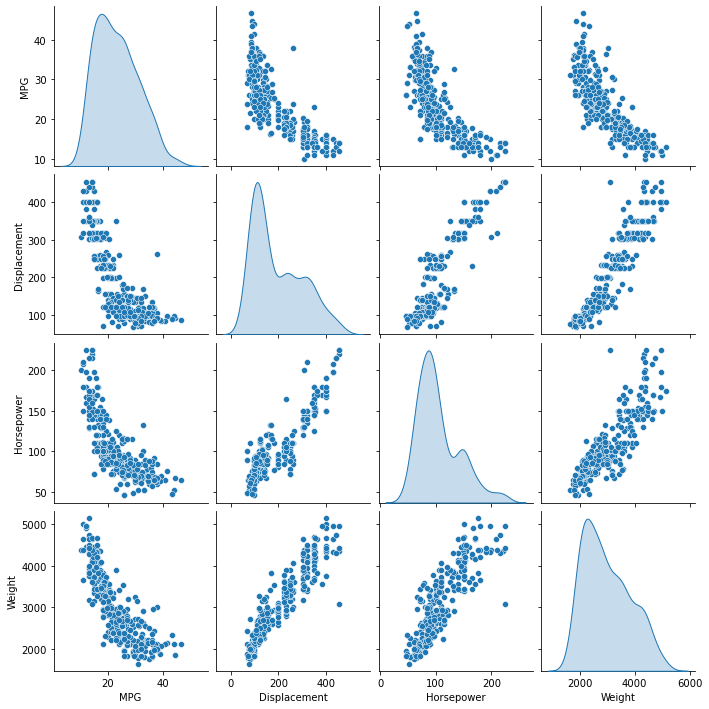

In [11]:
#have a quick look of training set
sns.pairplot(train_dataset[['MPG', 'Displacement','Horsepower','Weight']], diag_kind= "kde")

In [12]:
#And Also look at the overall statistics
train_stats = train_dataset.describe()
train_stats.pop('MPG')
train_stats.transpose()

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
PAK,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0
USA,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
ENG,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0


# Splitting Features from labels

In [13]:
train_labels = train_dataset.pop("MPG")
test_label = test_dataset.pop("MPG")

# Normalizing the data

In [14]:
def normalize(dataset):
    mean = train_stats.mean()
    std = train_stats.std()
    dataset = (dataset - mean)/std
    return dataset
norm_train_dataset = normalize(train_dataset)
norm_test_dataset = normalize(test_dataset)

In [15]:
norm_train_dataset.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,PAK,USA,ENG
146,-0.361553,-0.896969,-0.561596,-0.211554,-0.347720,-0.248195,-0.349824,-0.355563,-0.355607
282,-0.361553,-0.514833,-0.424723,0.281829,-0.321375,-0.193519,-0.349824,-0.355563,-0.355607
69,-0.324960,1.090139,0.333345,1.291815,-0.357129,-0.270066,-0.349824,-0.355563,-0.355607
378,-0.361553,-0.782328,-0.687941,-0.211554,-0.345838,-0.160713,-0.349824,-0.355563,-0.355607
331,-0.361553,-0.843470,-0.645826,-0.198656,-0.314789,-0.182583,-0.358849,-0.355563,-0.346593


# Building the model

In [16]:
def build_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(units= 64, activation = tf.nn.relu, input_shape = [len(train_dataset.keys())]))
    model.add(tf.keras.layers.Dense(units = 64, activation = tf.nn.relu))
    model.add(tf.keras.layers.Dense(units = 1))
    model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001), loss="mse", metrics= ['mae', 'mse'])
    return model

In [17]:
model = build_model()

In [18]:
#Lets take a look at the summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                640       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [19]:
#Lets try out a batch of model from training data and try to predict it

In [20]:
exm_batch = norm_train_dataset[:10]
exm_result = model.predict(exm_batch)
exm_result

array([[-0.4609588 ],
       [-0.38896862],
       [-0.56007063],
       [-0.4652511 ],
       [-0.46543515],
       [-0.30015215],
       [-0.49649212],
       [-0.40036204],
       [-0.31397927],
       [-0.43440485]], dtype=float32)

# Training the model

In [58]:
def train_model(model):
    history = model.fit(norm_train_dataset, train_labels, epochs=1000, validation_split=0.2, verbose = 0)
    return history

In [60]:
history = train_model(model)

In [61]:
hist = pd.DataFrame(history.history)
print(hist.columns)
hist['epoch'] = history.epoch
print(hist['epoch'])

Index(['loss', 'mae', 'mse', 'val_loss', 'val_mae', 'val_mse'], dtype='object')
0        0
1        1
2        2
3        3
4        4
      ... 
995    995
996    996
997    997
998    998
999    999
Name: epoch, Length: 1000, dtype: int64


# Plot the training model

In [68]:
def plot_MAE(hist):
    epoch = history.epoch
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Absolute Error (MPG)')
    plt.plot(epoch, hist['mae'], label='Train Error')
    plt.plot(epoch, hist['val_mae'], label='Val Error')
    plt.legend()
    plt.ylim([0,5])
    plt.show()

def plot_MSE(hist):
    epoch = history.epoch
    plt.figure(figsize=(15,15))
    plt.xlabel('Epoch')
    plt.ylabel('Mean Absolute Error (MPG)')
    plt.plot(epoch, hist['mse'], label='Train Error')
    plt.plot(epoch, hist['val_mse'], label='Val Error')
    plt.legend()
    plt.ylim([0,20])
    plt.show()

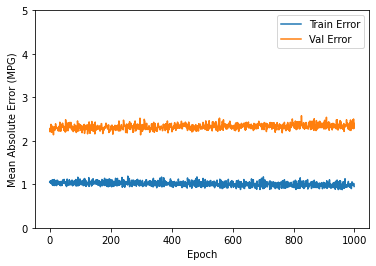

In [69]:
plot_MAE(hist)

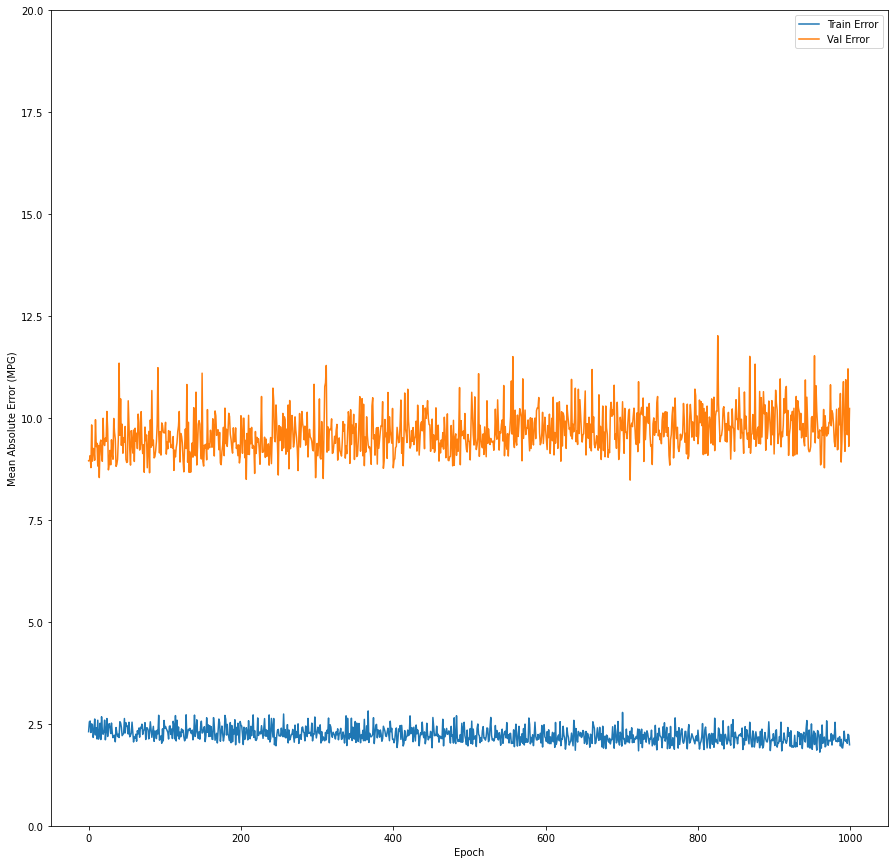

In [70]:
plot_MSE(hist)

See that the actual error and train error has alot of gab 
b/w them so we need to make the gap smaller and vice versa make the gap loss samller

# Early Stopping
is used when we need to stop training where the validation score does'nt improve. It helps the graph to reduce he difference.

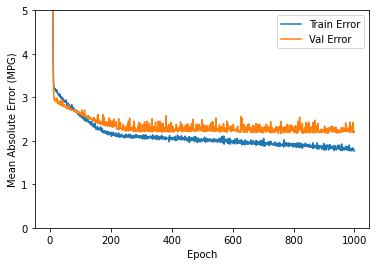

In [72]:
model = build_model()

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10) #Patience is amount of epochs check for imporovement

history = train_model(model)
hist = pd.DataFrame(history.history)
plot_MAE(hist)

In [80]:
#Evaluating the model on the test dataset
loss, mae, mse = model.evaluate(norm_test_dataset, test_label, verbose = 0)
print("The Testing Database Error is: ",mae) #The three values are loss, mae, mse

The Testing Database Error is:  1.9464157819747925


# Finally, Make Predictions

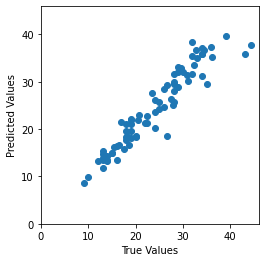

In [90]:
#We are making several predictions and then plot them out
test_pred = model.predict(norm_test_dataset).flatten()
plt.scatter(test_label, test_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.axis("equal")
plt.axis("square")
plt.xlim([0, plt.xlim()[1]])
plt.ylim([0, plt.ylim()[1]])
_ = plt.plot([100,100],[-100,100])

Text(0, 0.5, 'Count')

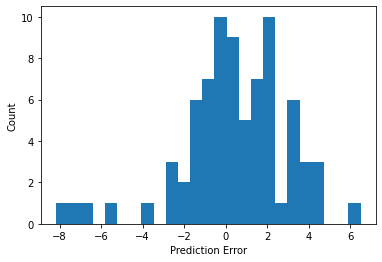

In [91]:
#For test error 
error = test_pred-test_label
plt.hist(error,bins = 25)
plt.xlabel("Prediction Error")
plt.ylabel("Count")